In [4]:
#Assignment 4
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import pandas as pd
import statistics
df=pd.read_excel('E:\Inference\Assignment 4\Data for python.xlsx')

In [5]:
#Displaying given data
df

,Position,Fertilizer,Yield
0,1,A,29.9
1,2,A,11.4
2,3,B,26.6
3,4,B,23.7
4,5,A,25.3
5,6,B,28.5
6,7,B,14.2
7,8,B,17.9
8,9,A,16.5
9,10,A,21.1


In [6]:
A_mean=df.loc[df['Fertilizer']=='A'].Yield.mean()
A_mean

20.839999999999996

In [7]:
B_mean=df.loc[df['Fertilizer']=='B'].Yield.mean()
B_mean


22.533333333333335

In [8]:
d_star=B_mean-A_mean

In [9]:
d_star

1.6933333333333387

In [10]:
std_A=statistics.stdev(df.loc[df['Fertilizer']=='A'].Yield)
std_A

7.245550358668415

In [11]:
std_B=statistics.stdev(df.loc[df['Fertilizer']=='B'].Yield)
std_B


5.4320039273427145

In [12]:
pooled_sd=np.sqrt((4*std_A**2+5*std_B**2)/9)

In [13]:
pooled_sd

6.302780103814271

In [14]:
import numpy as np
se=pooled_sd*np.sqrt(1/5+1/6)
se

3.816522882622381

In [15]:
# Finding t-score
T=d_star/se

In [16]:
T

0.4436848370655721

In [25]:
import scipy
from scipy import stats

In [26]:
#Finding p-value from the t-test
scipy.stats.t.sf(T, df=9)

0.33387265995495874

In [19]:
# Randomization
l=(29.9,11.4,26.6,23.7,25.3,28.5,14.2,17.9,16.5,21.1,24.3)
comb=combinations([29.9,11.4,26.6,23.7,25.3,28.5,14.2,17.9,16.5,21.1,24.3],6)
c=[]
for i in list(comb):
  c.append(i)
c[0]

(29.9, 11.4, 26.6, 23.7, 25.3, 28.5)

In [20]:
#Finding the sampling distribution as differ
differ=[]
for i in range(462):
 differ.append(sum(c[i])/6-(sum(l)-sum(c[i]))/5)

(array([ 8., 25., 46., 78., 91., 89., 65., 38., 18.,  4.]),
 array([-9.45333333, -7.49166667, -5.53      , -3.56833333, -1.60666667,
         0.355     ,  2.31666667,  4.27833333,  6.24      ,  8.20166667,
        10.16333333]),
 <BarContainer object of 10 artists>)

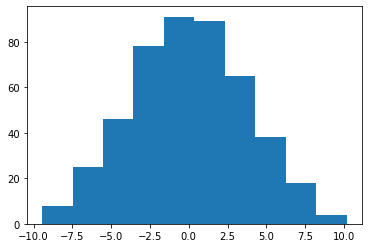

In [21]:
#Plotting the distribution
plt.hist(differ)

In [28]:
#Finding the p-value as percentile score of d-star
p=1-stats.percentileofscore(differ,d_star,kind='strict')/100
print(p)

0.3333333333333335
